In [1]:
import json

path = "json-logs.txt"

logs = [json.loads(line) for line in open(path)]

timezones = [l['tz'] for l in logs if 'tz' in l]

print timezones[:10]

[u'America/New_York', u'America/Denver', u'America/New_York', u'America/Sao_Paulo', u'America/New_York', u'America/New_York', u'Europe/Warsaw', u'', u'', u'']


In [2]:
from collections import defaultdict

def get_counts(seq):
    counter = defaultdict(int)
    for x in seq :
        counter[x] += 1
    return counter

counts = get_counts(timezones)

In [3]:
counts['America/New_York']

1251

In [4]:
def top_counts(counts,n=10):
    value_key_pairs = [(key,value) for key,value in counts.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(u'Europe/Sofia', 1),
 (u'Europe/Stockholm', 14),
 (u'Europe/Uzhgorod', 1),
 (u'Europe/Vienna', 6),
 (u'Europe/Vilnius', 2),
 (u'Europe/Volgograd', 1),
 (u'Europe/Warsaw', 16),
 (u'Europe/Zurich', 4),
 (u'Pacific/Auckland', 11),
 (u'Pacific/Honolulu', 36)]

In [5]:
from collections import Counter

counter = Counter(timezones)

counter.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

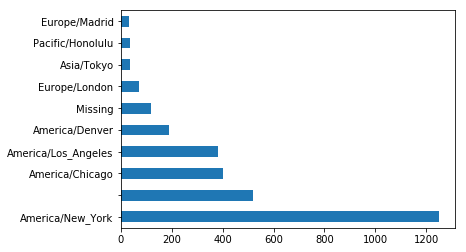

In [7]:
from pandas import DataFrame,Series

import pandas as pd

frame = DataFrame(logs)

frame['tz'][-10:]

tz_count = frame['tz'].fillna('Missing').value_counts()

tz_count[:10]

tz_count[:10].plot(kind = 'barh', rot = 0)
